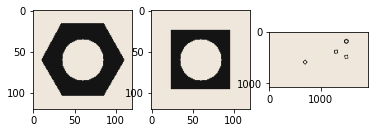

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Threshold for hexnut template = 20.0
Threshold for squarenut template = 20.0
Threshold for conveyor = 20.0


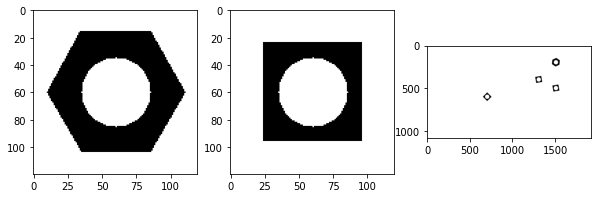

In [2]:
hexnut_gray=cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_gray=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_gray=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

ret1,hexnut_bin = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,squarenut_bin = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,conveyor_bin = cv.threshold(conveyor_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold for hexnut template = "+str(ret1))
print("Threshold for squarenut template = "+str(ret2))
print("Threshold for conveyor = "+str(ret3))

fig, ax = plt. subplots(1,3, figsize = (10,10))
ax[0].imshow(hexnut_bin,'gray', vmin=0, vmax=255)
ax[1].imshow(squarenut_bin,'gray', vmin=0, vmax=255)
ax[2].imshow(conveyor_bin,'gray', vmin=0, vmax=255)
plt.show()



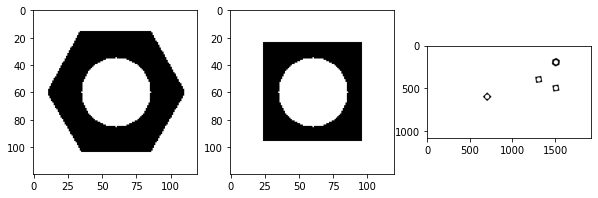

In [16]:
kernel = np.ones((3,3),np.uint8)

bin_list = [hexnut_bin, squarenut_bin, conveyor_bin]
closed_list = []
fig, ax = plt. subplots(1,3, figsize = (10,10))
for i in range(3):
    closed_list.append(cv.morphologyEx(bin_list[i], cv.MORPH_CLOSE, kernel))
    ax[i].imshow(closed_list[i],'gray', vmin=0, vmax=255)
    

In [5]:
connectivity = 4
hex_num_labels,hex_labels,hex_stat,hex_cent = cv.connectedComponentsWithStats(hexnut_bin, connectivity, cv.CV_32S)
print('There are {} connected components in Hexnut template.'.format(hex_num_labels))
print('Statistics:')
print(hex_stat)
print()
print('Centroids:')
print(hex_cent)

There are 3 connected components in Hexnut template.
Statistics:
[[  10   16  101   88 4724]
 [   0    0  120  120 7715]
 [  35   35   51   51 1961]]

Centroids:
[[59.83361558 59.22290432]
 [59.16863253 59.54257939]
 [60.         60.        ]]


In [6]:
connectivity = 8
belt_num_labels,belt_labels,belt_stat,belt_cent = cv.connectedComponentsWithStats(conveyor_bin, connectivity, cv.CV_32S)
print('There are {} connected components in Conveyor belt.'.format(belt_num_labels))
print('Statistics:')
print(belt_stat)
print()
print('Centroids:')
print(belt_cent)

There are 6 connected components in Conveyor belt.
Statistics:
[[    650     150     896     501   13938]
 [      0       0    1920    1080 2051818]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]

Centroids:
[[1274.92050509  400.1106328 ]
 [ 956.24678115  540.8845999 ]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


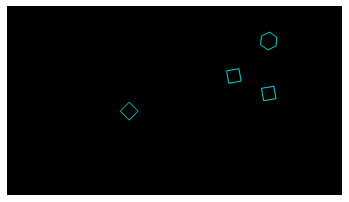

In [7]:
black_img=np.zeros(conveyor_f100.shape)
contours, hierarchy = cv.findContours(conveyor_bin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = [contours[i] for i in range(1,9,2)]
cv.drawContours(black_img, cnt, -1, (0,255,150), 3)
plt.imshow(black_img)
plt.axis('off')
plt.show()

In [13]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
F = []
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    F.append(frame)
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [14]:
# Yor code here.
import cv2 as cv
def object_count(frame, frame_name,):
    global total
    current_count = 0
    left_centers = []
    right_centers = []
    frame_contours = []

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (5,5), 0)
    _,thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU) 
    bitnot_img = cv.bitwise_not(thresh)
    contours, hierarchy = cv.findContours(bitnot_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for i in range(0, len(contours)):
        area = cv.contourArea(contours[i])
        if area > 4500 and area < 7000:
            frame_contours.append(contours[i])
    
    for i in frame_contours:
        M = cv.moments(i)
        cx = int(M['m10']/M['m00'])

        if (1000-cx) >= 0:
            left_centers.append(cx)
        else:
            right_centers.append(cx)
    for i in left_centers:
        if 1000-i < 10:
            current_count+= 1
            total+= 1
    
    text1 = 'Frame:' + str(frame_name)
    text2 = 'Current count of objects:' + str(current_count)
    text3 = 'Total counts of objects:' + str(total)
    cv.putText(frame,text1 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text2 , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,text3 , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)

    return frame

# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here
total = 0
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
     
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    frame_array.append(object_count(frame, f))

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
